In [1]:
%matplotlib notebook

import sys
import logging
import matplotlib.pyplot as plt

sys.path.append ("../DesignTool")
from smdtLibs.configFile import ConfigFile
from targets import TargetList
from smdtLibs.inOutChecker import InOutChecker
from maskLayouts import MaskLayouts, shrinkMask
from smdtLibs import utils, drawUtils

In [2]:
try:
    %load_ext nb_black
except:
    print("Ignored extension: nb_black")
    pass

<IPython.core.display.Javascript object>

In [3]:
logging.disable()

<IPython.core.display.Javascript object>

## Initialize configuration and read parameter file

The config file smdt.cfg contains general parameters for the application and the instrument, DEIMOS in this case.

The config file params.cfg contains parameters the user can modify through the UI. These are inherited from dsim.

In [4]:
config_fname = "../DesignTool/smdt.cfg"
param_fname = "../DesignTool/params.cfg"

config = ConfigFile(config_fname)
config.properties["params"] = ConfigFile(param_fname)

<IPython.core.display.Javascript object>

### Get the mask layout

MaskLayouts contains the geometry of the science detector.
There are various versions of the geometry.

"deimosOrig" is the layout inherited from dsim.

In [5]:
layout = MaskLayouts["deimos"]

<IPython.core.display.Javascript object>

### Read the targets, check what is inside and group by pcode

The pcode determines how the target is interpreted.
- \>= 0: selected
- -2: align box
- -1: guide box

In [6]:
input_fname = "../DeimosExamples/EvanKirby/n2419c.list"
tlist = TargetList(input_fname, useDSS=False, config=config)

# Check what is inside the mask
tlist.markInside (layout)

allTargets = tlist.targets
selectedTargets = allTargets[allTargets.selected > 0]
selectedTargets = selectedTargets[selectedTargets.pcode >= 0]

alignBoxes = allTargets[allTargets.pcode == -2]
guideBoxes = allTargets[allTargets.pcode == -1]

inTargets = allTargets[allTargets.inMask > 0]
inSelectedTargets = selectedTargets[selectedTargets.inMask > 0]
inAlignBoxes = alignBoxes[alignBoxes.inMask > 0]
inGuideBoxes = guideBoxes[guideBoxes.inMask > 0]


<IPython.core.display.Javascript object>

### What is in tlist?

In [7]:
print (f"Number of rows:\t{len(allTargets):5d}, inside {len(inTargets):5d}")
print (f"Selected:\t{len(selectedTargets):5d}, inside {len(inSelectedTargets):5d}")
print (f"Align boxes:\t{len(alignBoxes):5d}, inside {len(inAlignBoxes):5d}")
print (f"Guide boxes:\t{len(guideBoxes):5d}, inside {len(inGuideBoxes):5d}")


Number of rows:	 1187, inside   743
Selected:	   32, inside    32
Align boxes:	   14, inside    13
Guide boxes:	    7, inside     2


<IPython.core.display.Javascript object>

In [8]:
print("Center RA = {} hrs".format(utils.toSexagecimal(tlist.centerRADeg / 15)))
print("       DEC= {} deg".format(utils.toSexagecimal(tlist.centerDEC)))
print("       PA =  {:.3f} deg".format(tlist.positionAngle))

Center RA =  07:38:09.20 hrs
       DEC=  38:51:12.00 deg
       PA =  50.000 deg


<IPython.core.display.Javascript object>

## Plot all targets

<IPython.core.display.Javascript object>


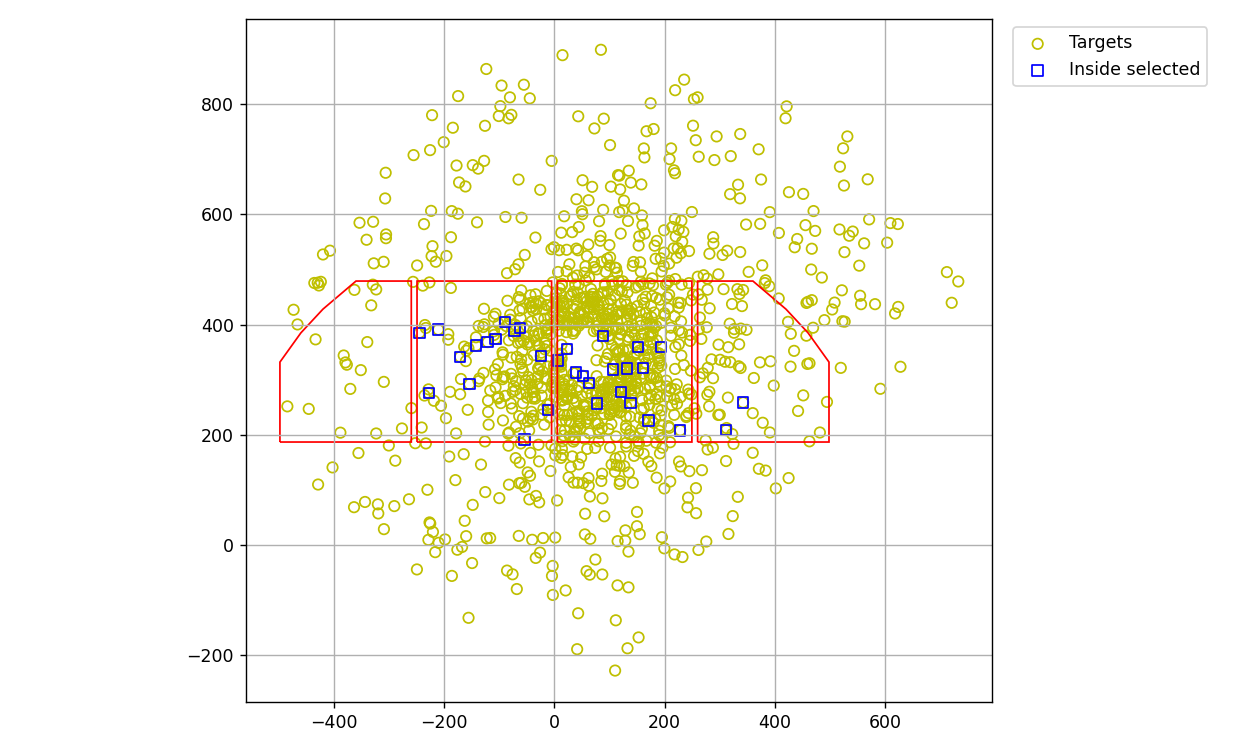

<IPython.core.display.Javascript object>

In [9]:
plt.figure(figsize=(10, 6))
plt.gca().set_aspect("equal")

# Plot the mask layout
drawUtils.drawPatch(plt.gca(), layout, fc="None", ec="r")

plt.scatter(allTargets.xarcs, allTargets.yarcs, fc="None", ec="y", label="Targets")
plt.scatter(
    inSelectedTargets.xarcs,
    inSelectedTargets.yarcs,
    fc="None",
    ec="b",
    marker="s",
    label="Inside selected",
)
plt.legend(bbox_to_anchor=(1.30, 1.0), loc="upper right")
plt.grid()
plt.tight_layout()

### Plot only inside the mask

<IPython.core.display.Javascript object>


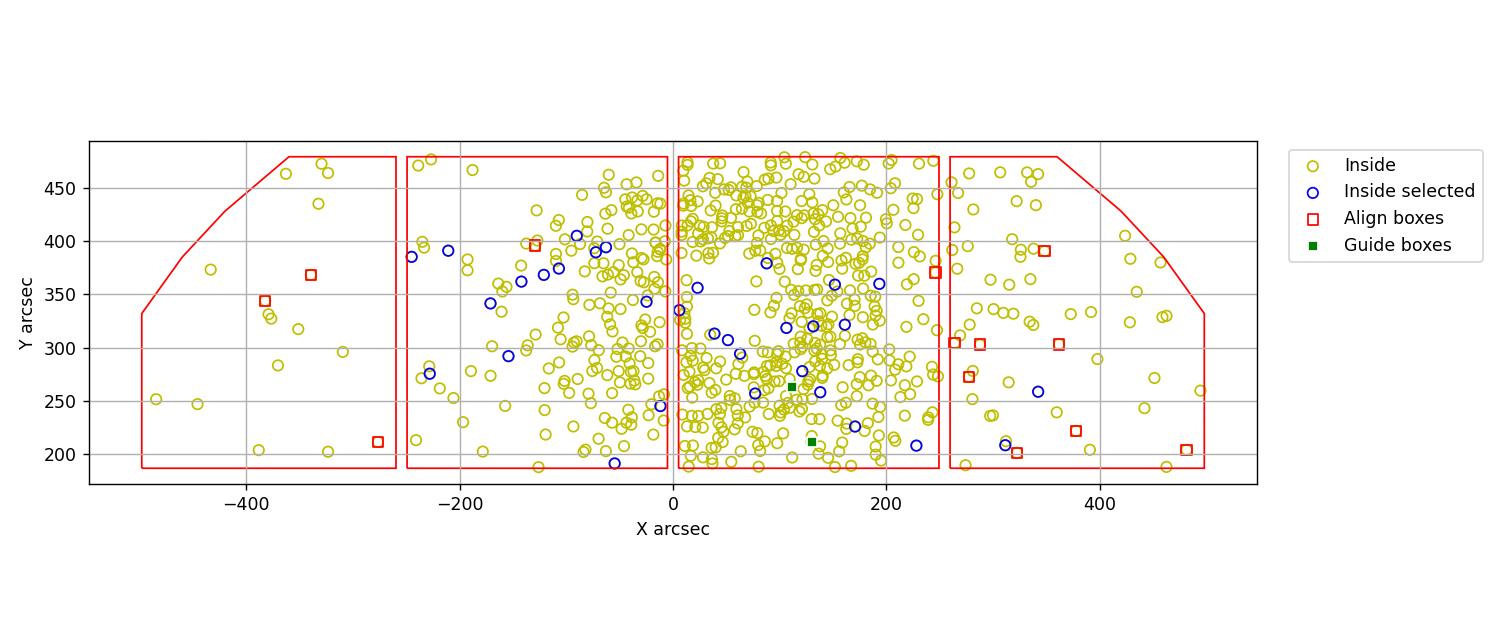

<IPython.core.display.Javascript object>

In [12]:
plt.figure(figsize=(12, 5))
plt.gca().set_aspect('equal')

# Plot the mask layou
drawUtils.drawPatch(plt.gca(), layout, fc='None', ec='r')

plt.scatter (inTargets.xarcs, inTargets.yarcs,  fc='None', ec='y', label='Inside')
plt.scatter (inSelectedTargets.xarcs, inSelectedTargets.yarcs, fc='None', ec='b', 
            label="Inside selected")

plt.scatter (inAlignBoxes.xarcs, inAlignBoxes.yarcs, fc='None', ec='r', marker='s', label='Align boxes')
plt.scatter (inGuideBoxes.xarcs, inGuideBoxes.yarcs, fc='g', ec='w', marker='s', label='Guide boxes')

plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right')
plt.xlabel ("X arcsec")
plt.ylabel ("Y arcsec")

plt.legend(bbox_to_anchor=(1.20, 1.0), loc="upper right")
plt.grid()
plt.tight_layout()


In [11]:
guideBoxes

,objectId,raHour,decDeg,eqx,mag,pBand,pcode,sampleNr,selected,slitWPA,length1,length2,slitWidth,orgIndex,inMask,xarcs,yarcs
206,N2419-S1223,7.637554,38.830822,2000.0,15.37,I,-1,3,1,60.0,4.0,4.0,1.5,206,0,1.513723,162.890241
211,N2419-S1229,7.637590,38.835522,2000.0,16.76,I,-1,3,1,60.0,4.0,4.0,1.5,211,0,13.540225,174.885526
269,N2419-S1302,7.638026,38.871792,2000.0,16.20,I,-1,2,1,60.0,4.0,4.0,1.5,269,1,111.541043,263.091614
337,N2419-S1389,7.638579,38.834922,2000.0,14.18,I,-1,3,1,60.0,4.0,4.0,1.5,337,0,44.025147,146.468732
344,N2419-S1397,7.638665,38.846608,2000.0,17.36,I,-1,2,1,60.0,4.0,4.0,1.5,344,0,73.839622,176.368859
372,N2419-S1442,7.639148,38.864111,2000.0,16.52,I,-1,2,1,60.0,4.0,4.0,1.5,372,1,129.900016,211.577578
412,N2419-S1499,7.639670,38.845503,2000.0,14.68,I,-1,3,1,60.0,4.0,4.0,1.5,412,0,103.655779,146.146923


<IPython.core.display.Javascript object>